# Introduction to Machine Learning

## Definition of Machine Learning
*Field of study that gives computers the ability to learn without being explicitly programmed. Arthur Samuel (1959)*

# Machine Learning algorithms

## Supervised learning
For every given input we know how correct output should look like.
### Examples
* Given data about the size of houses on the real estate market, try to predict their price.
* Given an email content, we would like to classify it either as spam or not spam

## Unsupervised learning
For set of inputs we're trying to find the structure or relationships between different inputs.
### Example
* Take a collection of 1,000,000 different genes, and find a way to automatically group these genes into groups that are somehow similar or related by different variables, such as lifespan, location, roles, and so on.

# Supervised learning example

## House pricing prediction

In [ ]:
Pkg.add("PyPlot")
Pkg.add("Interact")
Pkg.add("Reactive")

In [4]:
include("helper.jl")
m = 10
X, y = gen_samples(m)

[X y]

10×2 Array{Float64,2}:
  50.0  183.0
  67.0  177.0
  83.0  212.0
 100.0  225.0
 117.0  279.0
 133.0  304.0
 150.0  341.0
 167.0  370.0
 183.0  352.0
 200.0  417.0

Interact.Options{:SelectionSlider,Int64}(7: "input-3" = 0 Int64 ,"θ0",0,"0",Interact.OptionDict(DataStructures.OrderedDict("-300"=>-300,"-290"=>-290,"-280"=>-280,"-270"=>-270,"-260"=>-260,"-250"=>-250,"-240"=>-240,"-230"=>-230,"-220"=>-220,"-210"=>-210…),Dict(-90=>"-90",210=>"210",-80=>"-80",160=>"160",170=>"170",-200=>"-200",150=>"150",300=>"300",-250=>"-250",90=>"90"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.0 Float64 ,"θ1",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…),Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)),Any[],Any[],true,"horizontal")

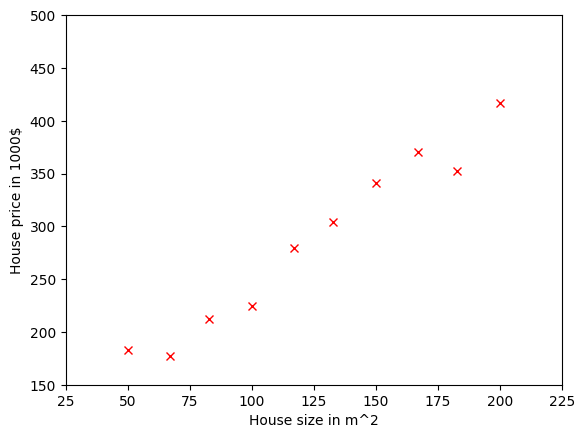

In [6]:
plot_samples(X, y)

# Hypothesis

## Single variable
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x
\end{equation*}

## Multiple variables
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
\end{equation*}

## Multiple variables - vector notation
\begin{equation*}
h_{\theta}(x) = x \cdot \Theta
\end{equation*}

\begin{equation*}
x = \left[1\ x_1\ x_2\ \cdots\ x_n \right],
\Theta = \begin{bmatrix}
       \theta_0 \\
       \theta_1 \\
       \theta_2 \\
       \vdots \\
       \theta_n
\end{bmatrix}
\end{equation*}

# Cost function

Choose $\theta_0$, $\theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x,y)$

\begin{equation*}
J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2
\end{equation*}

$x^{(i)}$ and $y^{(i)}$ denotes the i-th example in training set

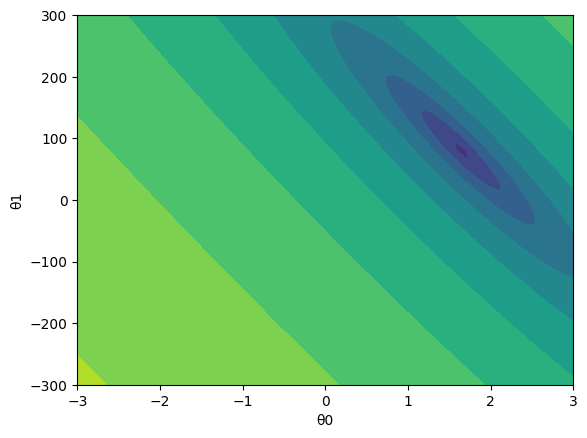

PyObject <matplotlib.text.Text object at 0x7f001fa06fd0>

In [7]:
_X=[ones(m, 1) X]

J(Θ) = 1/2m * sum(((_X * Θ) - y).^2)

plot_cost(J)

# Cost optimization

## Gradient descent algorithm
`repeat for every` $j=0,\dots,n$

\begin{equation*}
\theta_j:=\theta_j - \alpha \frac{\partial}{\partial \theta_j}J\left(\theta_0,\dots,\theta_n\right)
\end{equation*}

`end repeat`

$\alpha$ denotes the learning rate

In [8]:
α=10.0^-4
Θ=[0.0, 0.0]

G(Θ) = 1/m * _X' * (_X * Θ - y)

for i=1:10^6
    Θ = Θ - α * G(Θ)
end

Θ

2-element Array{Float64,1}:
 81.5119
  1.6359

# Improving the algorithm

In [7]:
Pkg.add("Optim")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Optim
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Interact
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Reactive
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [9]:
using Optim

Θ=[0.0, 0.0]

G(Θ, res) = res[:] = G(Θ)

optimize(J, G, Θ, GradientDescent())

Results of Optimization Algorithm
 * Algorithm: Gradient Descent
 * Starting Point: [0.0,0.0]
 * Minimizer: [81.5121475201472,1.635902819117658]
 * Minimum: 1.208171e+02
 * Iterations: 10
 * Convergence: false
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 71
 * Gradient Calls: 71

# Classification problems

## Why linear regression is not suitable for classification problems?

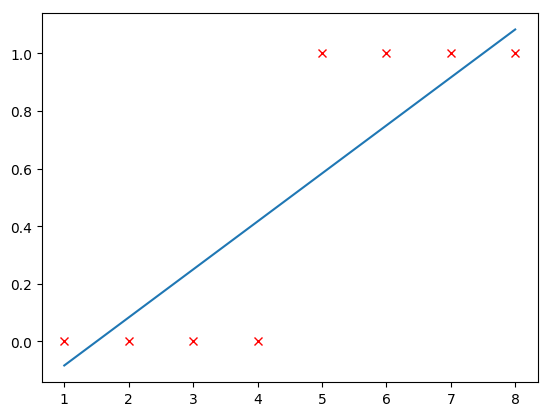

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f001f67ff90>

In [10]:
X = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0, 0, 0, 0, 1, 1, 1, 1]
plot(X, y, "rx")
plot(X, 1/6 * (X - 1.5))

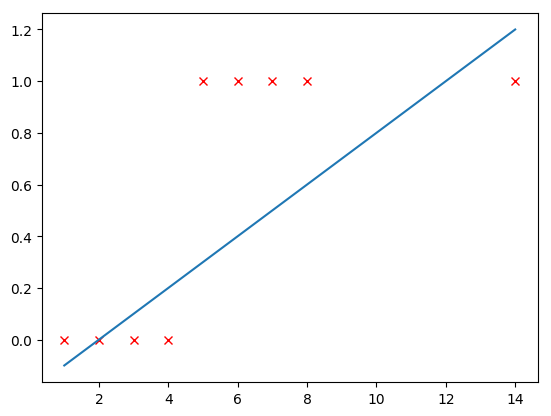

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f001f5cb9d0>

In [11]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 14]
y = [0, 0, 0, 0, 1, 1, 1, 1, 1]
plot(X, y, "rx")
plot(X, 1/10*(X-2))

## Output of logistic regression
\begin{equation*}
h_{\theta}(x) = s(\Theta^Tx)\\
s(z)=\frac{1}{1+e^{-z}}
\end{equation*}

In [13]:
sig(z) = 1.0 ./ (1.0 + exp(-z))


sig([-10, -1, 0, 1, 10])

5-element Array{Float64,1}:
 4.53979e-5
 0.268941  
 0.5       
 0.731059  
 0.999955  

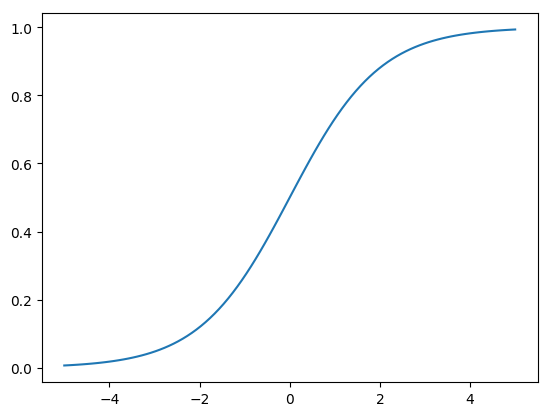

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f001f5121d0>

In [14]:
z = linspace(-5,5,100)
plot(z, sig(z))

# Installing required dependencies

In [2]:
Pkg.add("MNIST")
Pkg.add("Images")
Pkg.add("ImageMagick")

INFO: Installing MNIST v0.0.2
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of MNIST
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Images
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of ImageMagick
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Interact
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Reactive
INFO: Use `Pkg.update()` to get the latest versions of your packages


# Importing the data

In [38]:
using MNIST

X, y = traindata()

(
[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],

[5.0,0.0,4.0,1.0,9.0,2.0,1.0,3.0,1.0,4.0  …  9.0,2.0,9.0,5.0,1.0,8.0,3.0,5.0,6.0,8.0])

# Inspecting the data

In [39]:
size(X), size(y)

((784,60000),(60000,))

In [40]:
(minimum(X), maximum(X))

(0.0,255.0)

## Normalizing the data

In [41]:
X = X'
X /= 255.0

all(x -> 0.0 <= x <= 1.0, X), size(X)

(true,(60000,784))

## Displaying individual images

In [43]:
m, n = size(X)
sqr_n = Int64(√n)

s = slider(1:m)

Interact.Slider{Int64}(13: "input-5" = 30000 Int64 ,"",30000,1:60000,"horizontal",true,"d",true)

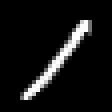

In [44]:
using Images

map(i -> colorview(Gray, reshape(X[i, :], sqr_n, sqr_n)), signal(s))

In [49]:
map(i -> y[i], signal(s))

1.0

In [50]:
using Optim

m = 1000
_X = [ones(m, 1) X[1:m, :]]
Θ = zeros(n+1)
λ = 0.1
All_Θ = zeros(10, n+1)

for i = 1:10
    println("iteration $i")
    _y = y[1:m] .== i
    
    local J_reg(Θ) = (-_y' * log(sig(_X * Θ)) - (1.0 - _y') * log(1 - sig(_X * Θ)))[1] + λ/2m * sum(Θ[2:end] .^ 2)
    local G_reg(Θ) = 1/m * _X' * (sig(_X * Θ) - _y) + unshift!(λ/m * Θ[2:end], 0.0)
    local G_reg!(Θ, res) = res[:] = G_reg(Θ)

    res = optimize(J_reg, G_reg!, zeros(n+1), GradientDescent())
    All_Θ[i,:] = res.minimizer
end

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


-2.825485454029879

In [48]:
map(i -> [1 X[i,:]'] * res.minimizer, signal(s))

1-element Array{Float64,1}:
 -1.24359